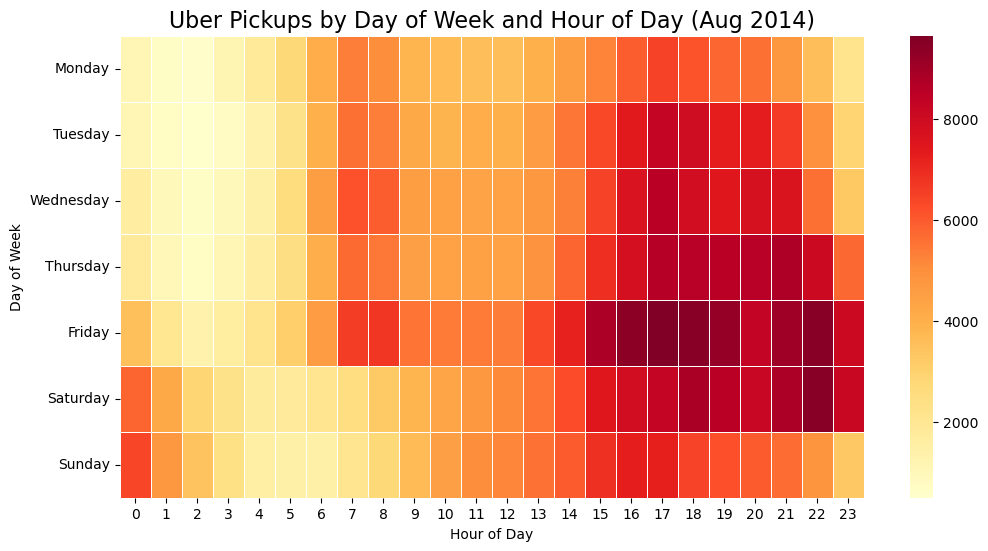

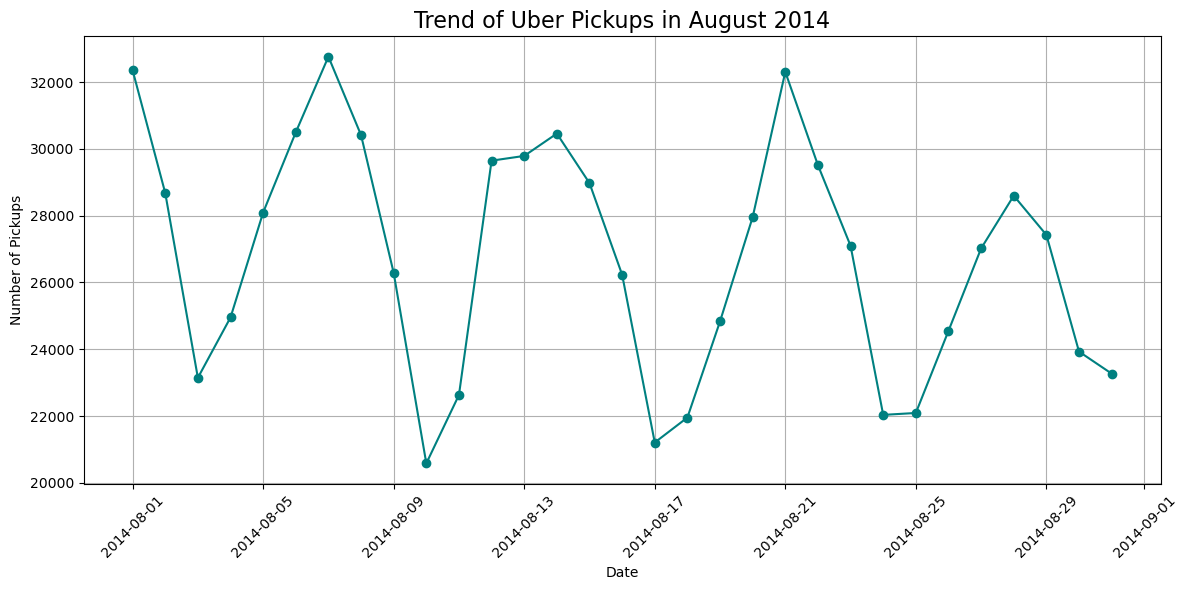

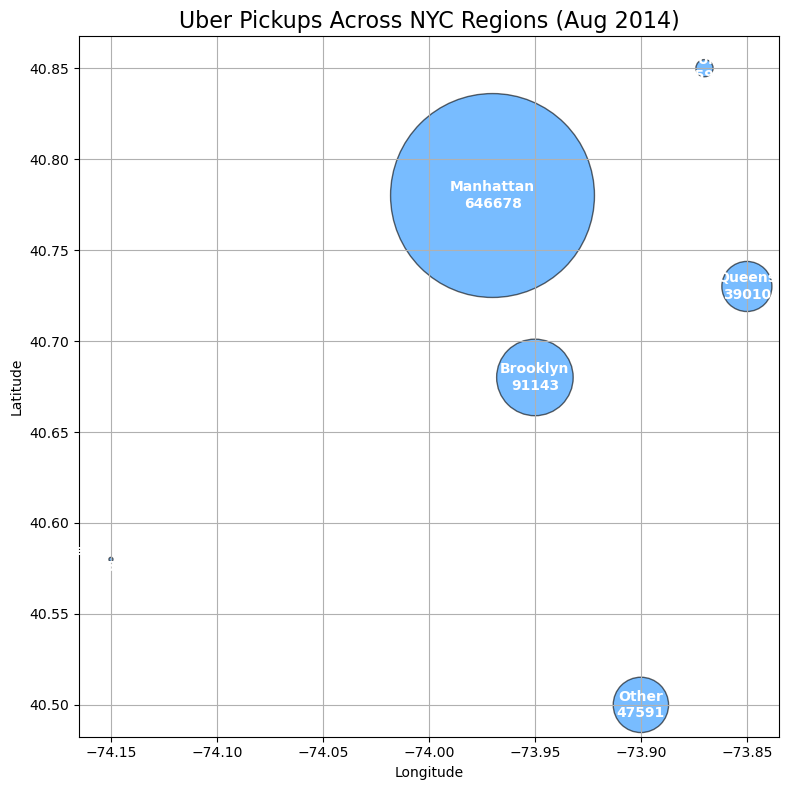

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ============================
# 1) HEATMAP: Uber pickups by day & hour
# ============================

# Load dataset
df = pd.read_csv('uber-raw-data-aug14.csv')

# Convert Date/Time
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract features
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
df['Hour'] = df['Date/Time'].dt.hour

# Order days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Pivot table for heatmap
heatmap_data = df.pivot_table(values='Date/Time', index='DayOfWeek', columns='Hour', aggfunc='count')
heatmap_data = heatmap_data.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Uber Pickups by Day of Week and Hour of Day (Aug 2014)', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


# ============================
# 2) LINE CHART: Trend of Uber pickups across the month
# ============================

# Extract date
df['Date'] = df['Date/Time'].dt.date

# Group by day
daily_pickups = df.groupby('Date').size()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_pickups.index, daily_pickups.values, marker='o', linestyle='-', color='teal')

plt.title('Trend of Uber Pickups in August 2014', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ============================
# 3) BUBBLE CHART: Pickups by NYC region (using coordinates)
# ============================

# Region classification function
def classify_region(lat, lon):
    if 40.70 <= lat <= 40.85 and -74.02 <= lon <= -73.93:
        return 'Manhattan'
    elif 40.57 <= lat <= 40.74 and -74.05 <= lon <= -73.85:
        return 'Brooklyn'
    elif 40.84 <= lat <= 40.91 and -73.92 <= lon <= -73.77:
        return 'Bronx'
    elif 40.64 <= lat <= 40.79 and -73.87 <= lon <= -73.73:
        return 'Queens'
    elif 40.50 <= lat <= 40.65 and -74.25 <= lon <= -74.05:
        return 'Staten Island'
    else:
        return 'Other'

# Apply classification
df['Region'] = df.apply(lambda row: classify_region(row['Lat'], row['Lon']), axis=1)

# Count pickups
region_pickups = df['Region'].value_counts().reset_index()
region_pickups.columns = ['Region', 'Pickups']

# Coordinates for bubble placement
region_coords = {
    'Manhattan': (40.78, -73.97),
    'Brooklyn': (40.68, -73.95),
    'Queens': (40.73, -73.85),
    'Bronx': (40.85, -73.87),
    'Staten Island': (40.58, -74.15),
    'Other': (40.5, -73.9)
}

# Add coordinates to table
region_pickups['Lat'] = region_pickups['Region'].map(lambda r: region_coords[r][0])
region_pickups['Lon'] = region_pickups['Region'].map(lambda r: region_coords[r][1])

# Plot bubble chart
plt.figure(figsize=(8, 8))
plt.scatter(
    region_pickups['Lon'], 
    region_pickups['Lat'], 
    s=region_pickups['Pickups'] / 30,  # scale bubble size
    alpha=0.6, 
    c='dodgerblue', 
    edgecolors='black'
)

# Add labels
for i, row in region_pickups.iterrows():
    plt.text(row['Lon'], row['Lat'], f"{row['Region']}\n{row['Pickups']}",
             ha='center', va='center', fontsize=10, weight='bold', color='white')

plt.title('Uber Pickups Across NYC Regions (Aug 2014)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

